# Linear Regression for Asset Pricing
## Project 2: APT (Arbitrage Price Theory)
### Milestone 2: APT Model

In [1]:
import pandas as pd          ## Data engine
import numpy as np

import statsmodels.api as sm ## Model

import seaborn as sns        ## Visualization
from matplotlib import pyplot as plt

# Data set #1 - Recent data

<b>Tickers</b>: semiconductor/AI + S&P500\
<b>Period</b>: 2 most recent years\
<b>Periodicity</b>: Monthly

### Polygon.io

In [2]:
### Restore the stock data
scen1_stocks = pd.read_csv('scen1_stocks.csv', index_col='date')
scen1_stocks.head()

,AMD,INTC,MSFT,NVDA,SPY
date,,,,,
2023-01-31,75.15,28.26,247.81,19.537,406.48
2023-02-28,78.58,24.93,249.42,23.216,396.26
2023-03-31,98.01,32.67,288.30,27.777,409.39
2023-04-30,89.37,31.06,307.26,27.749,415.93
2023-05-31,118.21,31.44,328.39,37.834,417.85


### FRED

In [3]:
### recall persisted FRED data
scen1_fred = pd.read_csv("scen1_fred.csv", index_col='month')\
                .drop('Unnamed: 0',axis=1)
scen1_fred.head()

,potential_inflation,industrial_prod,risk_free
month,,,
2023-01-31,325.520,102.7476,4.69
2023-02-28,327.499,102.8003,4.93
2023-03-31,328.457,102.8143,4.68
2023-04-30,329.868,103.2241,4.68
2023-05-31,330.663,102.9809,4.91


In [4]:
### Combine data
scen1 = pd.merge(scen1_stocks, scen1_fred
                 , left_index=True
                 , right_index=True, how = 'inner')
scen1.index.name = 'fiscal_end'
scen1.head()

,AMD,INTC,MSFT,NVDA,SPY,potential_inflation,industrial_prod,risk_free
fiscal_end,,,,,,,,
2023-01-31,75.15,28.26,247.81,19.537,406.48,325.520,102.7476,4.69
2023-02-28,78.58,24.93,249.42,23.216,396.26,327.499,102.8003,4.93
2023-03-31,98.01,32.67,288.30,27.777,409.39,328.457,102.8143,4.68
2023-04-30,89.37,31.06,307.26,27.749,415.93,329.868,103.2241,4.68
2023-05-31,118.21,31.44,328.39,37.834,417.85,330.663,102.9809,4.91


In [5]:
### Assess as rates of change or return
scen1_returns = scen1.pct_change().dropna()
scen1_returns.head()

,AMD,INTC,MSFT,NVDA,SPY,potential_inflation,industrial_prod,risk_free
fiscal_end,,,,,,,,
2023-02-28,0.045642,-0.117834,0.006497,0.188309,-0.025143,0.006080,0.000513,0.051173
2023-03-31,0.247264,0.310469,0.155882,0.196459,0.033135,0.002925,0.000136,-0.050710
2023-04-30,-0.088154,-0.049281,0.065765,-0.001008,0.015975,0.004296,0.003986,0.000000
2023-05-31,0.322703,0.012234,0.068769,0.363437,0.004616,0.002410,-0.002356,0.049145
2023-06-30,-0.036376,0.063613,0.036999,0.118095,0.060859,0.003411,-0.005826,0.067210


In [6]:
### Calculate excess returns
cols = scen1_returns.columns
for i in cols:
    scen1_returns["excess_return_"+str(i)] 
    = scen1_returns[i] - scen1_returns['risk_free']
scen1_returns.tail()

,AMD,INTC,MSFT,NVDA,SPY,potential_inflation,industrial_prod,risk_free,excess_return_AMD,excess_return_INTC,excess_return_MSFT,excess_return_NVDA,excess_return_SPY,excess_return_potential_inflation,excess_return_industrial_prod,excess_return_risk_free
fiscal_end,,,,,,,,,,,,,,,,
2024-07-31,-0.109303,-0.007427,-0.063989,-0.052776,0.012109,0.001327,-0.006967,-0.041096,-0.068207,0.033669,-0.022893,-0.011681,0.053205,0.042423,0.034129,0.0
2024-08-31,0.028239,-0.283019,-0.002892,0.020082,0.023366,0.000929,0.005355,-0.095918,0.124158,-0.187101,0.093026,0.116000,0.119284,0.096848,0.101274,0.0
2024-09-30,0.104470,0.064428,0.031548,0.017341,0.017882,0.001976,-0.005382,-0.090293,0.194763,0.154722,0.121842,0.107634,0.108176,0.092269,0.084911,0.0
2024-10-31,-0.121953,-0.082694,-0.055659,0.093215,-0.008924,0.001496,-0.004057,0.042184,-0.164136,-0.124878,-0.097842,0.051031,-0.051107,-0.040688,-0.046241,0.0
2024-11-30,-0.047859,0.117565,0.042107,0.041353,0.059634,-0.000099,-0.001471,0.030952,-0.078811,0.086613,0.011154,0.010400,0.028681,-0.031051,-0.032423,0.0


## File operations

In [7]:
### Persist
scen1_returns.to_csv('p2m2_scen1_returns.csv')

In [3]:
### Read back in
scen1_inputs = pd.read_csv('p2m2_scen1_returns.csv')\
                .set_index('fiscal_end')
scen1_inputs.head()

,AMD,INTC,MSFT,NVDA,SPY,potential_inflation,industrial_prod,risk_free,excess_return_AMD,excess_return_INTC,excess_return_MSFT,excess_return_NVDA,excess_return_SPY,excess_return_potential_inflation,excess_return_industrial_prod,excess_return_risk_free
fiscal_end,,,,,,,,,,,,,,,,
2023-02-28,0.045642,-0.117834,0.006497,0.188309,-0.025143,0.006080,0.000513,0.051173,-0.005531,-0.169007,-0.044676,0.137137,-0.076315,-0.045093,-0.050660,0.0
2023-03-31,0.247264,0.310469,0.155882,0.196459,0.033135,0.002925,0.000136,-0.050710,0.297974,0.361179,0.206592,0.247169,0.083845,0.053635,0.050846,0.0
2023-04-30,-0.088154,-0.049281,0.065765,-0.001008,0.015975,0.004296,0.003986,0.000000,-0.088154,-0.049281,0.065765,-0.001008,0.015975,0.004296,0.003986,0.0
2023-05-31,0.322703,0.012234,0.068769,0.363437,0.004616,0.002410,-0.002356,0.049145,0.273558,-0.036911,0.019624,0.314291,-0.044529,-0.046735,-0.051501,0.0
2023-06-30,-0.036376,0.063613,0.036999,0.118095,0.060859,0.003411,-0.005826,0.067210,-0.103586,-0.003597,-0.030211,0.050885,-0.006351,-0.063798,-0.073036,0.0


In [4]:
### Read back in
scen1_inputs = pd.read_csv('p2m2_scen1_returns.csv')\
                .set_index('fiscal_end')
scen1_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2023-02-28 to 2024-11-30
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AMD                                22 non-null     float64
 1   INTC                               22 non-null     float64
 2   MSFT                               22 non-null     float64
 3   NVDA                               22 non-null     float64
 4   SPY                                22 non-null     float64
 5   potential_inflation                22 non-null     float64
 6   industrial_prod                    22 non-null     float64
 7   risk_free                          22 non-null     float64
 8   excess_return_AMD                  22 non-null     float64
 9   excess_return_INTC                 22 non-null     float64
 10  excess_return_MSFT                 22 non-null     float64
 11  excess_return_NVDA                 22 non-null  

## Visualization

In [9]:
### Get only excess returns columns
excess_ret = [c for c in scen1_inputs.columns 
              if c.startswith('excess_return') 
              and not(c.endswith('risk_free'))]
print(excess_ret)

['excess_return_AMD', 'excess_return_INTC', 'excess_return_MSFT', 'excess_return_NVDA', 'excess_return_SPY', 'excess_return_potential_inflation', 'excess_return_industrial_prod']


In [10]:
### rename list for visibility
xs_ren_list = {'excess_return_AMD':'amd'
    ,'excess_return_INTC':'intc'
    ,'excess_return_MSFT':'msft'
    ,'excess_return_NVDA':'nvda'
    ,'excess_return_SPY':'sp500'
    ,'excess_return_potential_inflation':'inflation'
    ,'excess_return_industrial_prod':'ind_activity'}

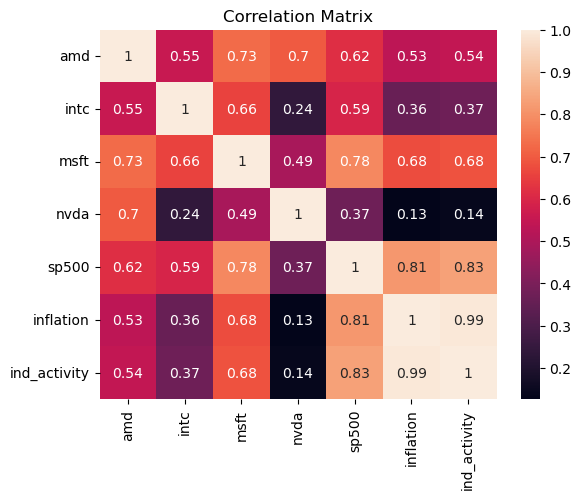

In [11]:
### Visualize correlations on a heat map
scen1_xs = scen1_inputs[excess_ret].rename(xs_ren_list,axis=1)
heat_corr = scen1_xs.corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

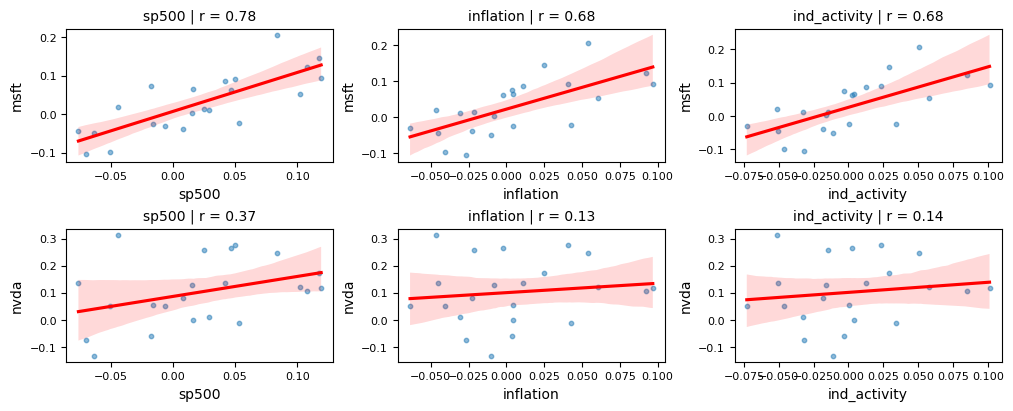

In [12]:
row_vars = ['msft', 'nvda']
col_vars = ['sp500', 'inflation', 'ind_activity']

fig, axes = plt.subplots(len(row_vars), len(col_vars), figsize=(10, 4)
                         , constrained_layout=True)

for i, row in enumerate(row_vars):
    for j, col in enumerate(col_vars):
        ax = axes[i, j]
        sns.regplot(x=scen1_xs[col], y=scen1_xs[row]
                    , scatter_kws={'alpha':0.5, 's':10}
                    , line_kws={'color':'red'}
                    , ax=ax, label=None)
        corr_coeff = np.corrcoef(scen1_xs[col]
                             , scen1_xs[row])[0, 1]
        ax.set_title(f'{col} | r = {corr_coeff:.2f}', fontsize=10)
        ax.tick_params(axis='both', labelsize=8)
plt.show()

## Build the APT Model

$
r_{\text{MSFT}} - r_f = \alpha + \beta_{\text{SPY}} (r_{\text{SPY}} - r_f) + \beta_{\text{CPIe}} (r_{\text{CPIe}} - r_f) + \beta_{\text{IndProd}} (r_{\text{IndProd}} - r_f) + \epsilon
$


In [13]:
all_x = ['excess_return_SPY'
         , 'excess_return_potential_inflation'
         , 'excess_return_industrial_prod']
print(all_x)

['excess_return_SPY', 'excess_return_potential_inflation', 'excess_return_industrial_prod']


In [15]:
### Build model - going back to the dataframe we brought back in
y_msft = scen1_inputs['excess_return_MSFT']
X = scen1_inputs[all_x]
X = sm.add_constant(X, prepend=False)
APT_MSFT = sm.OLS(y_msft, X)
APT_results_MSFT = APT_MSFT.fit()

In [16]:
APT_results_MSFT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_MSFT   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     9.697
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           0.000497
Time:                        23:52:12   Log-Likelihood:                 35.733
No. Observations:                  22   AIC:                            -63.47
Df Residuals:                      18   BIC:                            -59.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
excess_return_SPY                     0.9171      0.347      2.643      0.017       0.188       1.646
excess_return_potential_inflation     0.6593      2.051      0.321      0.752      -3.650       4.969
excess_return_industrial_prod        -0.4826      2.138     -0.226      0.824      -4.975       4.010
const                                 0.0070      0.015      0.472      0.643      -0.024       0.038
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.615
Skew:                           0.394   Prob(JB):                        0.735
Kurtosis:                       2.774   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
MSFT_out = pd.DataFrame(
    zip(APT_results_MSFT.params, APT_results_MSFT.pvalues),
    columns=['Beta', 'p-value'],
    index=['S&P500 ETF'
           , 'Inflation'
           , 'Industrial Activity'
           , 'Constant']
)
print("For Microsoft - MSFT")
print(MSFT_out)

For Microsoft - MSFT
                         Beta   p-value
S&P500 ETF           0.917059  0.016518
Inflation            0.659255  0.751601
Industrial Activity -0.482561  0.824001
Constant             0.007019  0.642802


In [18]:
### Model for supplier/competitor NVDA
y_nvda = scen1_inputs['excess_return_NVDA']
X = scen1_inputs[all_x]
X = sm.add_constant(X, prepend=False)
APT_NVDA = sm.OLS(y_nvda, X)
APT_results_NVDA = APT_NVDA.fit()

In [19]:
NVDA_out = pd.DataFrame(
    zip(APT_results_NVDA.params, APT_results_NVDA.pvalues),
    columns=['Beta', 'p-value'],
    index=['S&P500 ETF'
           , 'Inflation'
           , 'Industrial Activity'
           , 'Constant']
)
print("For NVDA")
print(NVDA_out)

For NVDA
                         Beta   p-value
S&P500 ETF           1.680226  0.038291
Inflation            0.264861  0.953128
Industrial Activity -1.809522  0.700678
Constant             0.069316  0.045370


In [20]:
### Side by side
display(pd.concat([NVDA_out, MSFT_out], axis=1, keys=["NVDA", "MSFT"]))

NVDA                MSFT          
                         Beta   p-value      Beta   p-value
S&P500 ETF           1.680226  0.038291  0.917059  0.016518
Inflation            0.264861  0.953128  0.659255  0.751601
Industrial Activity -1.809522  0.700678 -0.482561  0.824001
Constant             0.069316  0.045370  0.007019  0.642802

In [21]:
# Set the stock value relative to first month
scen1_show = scen1_stocks.copy()
scen1_show = scen1_show / scen1_show.iloc[0]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# First plot: Month-end close relative to Jan 2023
sns.lineplot(data=scen1_show[['MSFT', 'NVDA', 'SPY']], ax=axes[0])
axes[0].set_title('Month-end close relative to Jan 2023')  
axes[0].set_ylabel('Multiples of Jan 2023 Price')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)  

# Second plot: Excess Returns, percent rate
sns.lineplot(data=scen1_inputs[['MSFT', 'NVDA','SPY']], ax=axes[1])
axes[1].set_title('Month-over-month returns') 
axes[1].set_ylabel('Excess Returns')
axes[1].tick_params(axis='x', rotation=45, labelsize=10) 

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

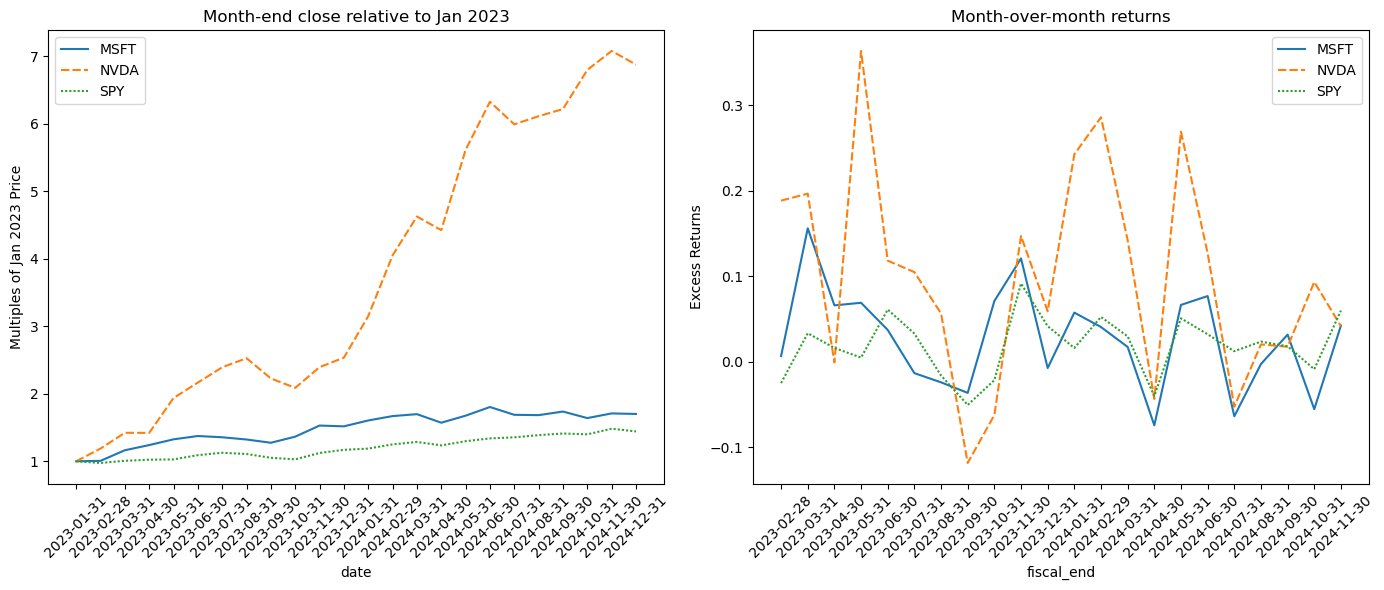

In [103]:
### Visualization confirms MSFT is blue-chip, NVDA is rapid growth